<a href="https://colab.research.google.com/github/Anusha796/Anusha796/blob/main/projectmini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_russian_plate_number.xml

--2021-07-29 05:11:18--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_russian_plate_number.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75482 (74K) [text/plain]
Saving to: ‘haarcascade_russian_plate_number.xml’

haarcascade_russian 100%[===================>]  73.71K  --.-KB/s    in 0.01s   

2021-07-29 05:11:18 (5.94 MB/s) - ‘haarcascade_russian_plate_number.xml’ saved [75482/75482]



In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/8/85/GB_ZEV_Number_Plate.jpg/328px-GB_ZEV_Number_Plate.jpg -O demo.jpg

--2021-07-28 18:33:59--  https://upload.wikimedia.org/wikipedia/commons/thumb/8/85/GB_ZEV_Number_Plate.jpg/328px-GB_ZEV_Number_Plate.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28394 (28K) [image/jpeg]
Saving to: ‘demo.jpg’

demo.jpg            100%[===================>]  27.73K  --.-KB/s    in 0.02s   

2021-07-28 18:33:59 (1.20 MB/s) - ‘demo.jpg’ saved [28394/28394]



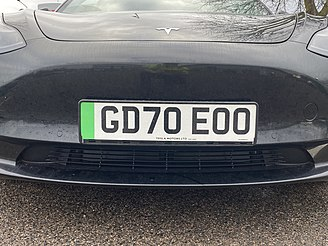

True

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('demo.jpg')
cv2.rectangle(img,(590,445),(295,385),(0,0,255),5)
cv2.putText(img,"plate",(400,377),cv2.FONT_HERSHEY_PLAIN,3,(255,0,0))
cv2_imshow(img)
cv2.imwrite("Output.jpg",img)

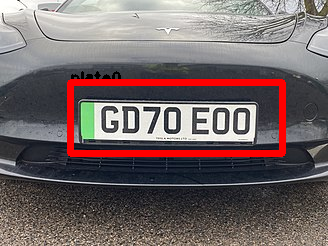

In [ ]:
import cv2 
from google.colab.patches import cv2_imshow
img=cv2.imread('demo.jpg')
model_plate=cv2.CascadeClassifier('/content/haarcascade_russian_plate_number.xml')
demo_plate = model_plate.detectMultiScale(img,1.1,5)
count=0
for(x,y,w,h) in demo_plate:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),5)
  cv2.putText(img,f"plate{count}",(x,y),cv2.FONT_HERSHEY_PLAIN,1,(0,0,0),2)
  count+=1
for(x,y,w,h) in demo_plate:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),5)
cv2_imshow(img)


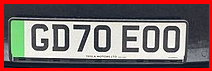

In [ ]:
import cv2 
from google.colab.patches import cv2_imshow
img=cv2.imread('demo.jpg')
model_plate=cv2.CascadeClassifier('/content/haarcascade_russian_plate_number.xml')
demo_plate = model_plate.detectMultiScale(img,1.1,2)
count=0
for(x,y,w,h) in demo_plate:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),5)
  cv2.putText(img,f"plate{count}",(x-25,y-25),cv2.FONT_HERSHEY_PLAIN,1,(0,0,0),2)
  plate=img[y:y+h,x:x+w]
  cv2_imshow(plate)
  cv2.imwrite(f'plate{count}.jpg',plate)
  count+=1
  cv2.imwrite(f'plate{count}.jpg',plate)


In [ ]:

!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 40 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,808 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [ ]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14071 sha256=d745740cdf6ba1b56be1b100608119772245670862d78261fe428b2616c5d981
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract


In [ ]:
import cv2 
from google.colab.patches import cv2_imshow
import pytesseract
img =cv2.imread('/content/plate0.jpg')
a=pytesseract.image_to_string(img)
print(a)


| co70 E00m



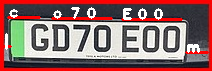

In [ ]:
img = cv2.imread('/content/plate0.jpg')
k,l,d=img.shape
boxes=pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
  b=b.split()
  x,y,w,h=int(b[1]),int(b[4]),int(b[3]),int(b[4])
  cv2.rectangle(img,(x,k-y),(w,k-h),(0,0,255),2)
  cv2.putText(img,b[0],(x,k-y),cv2.FONT_HERSHEY_PLAIN,1,(255,255,255),2)
cv2_imshow(img)

In [ ]:
#streamlit for ocr 

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract --quiet
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet
from pyngrok import ngrok

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
     |████████████████████████████████| 7.9 MB 7.7 MB/s 
     |████████████████████████████████| 4.2 MB 52.5 MB/s 
     |████████████████████████████████| 170 kB 59.6 MB/s 
     |████████████████████████████████| 75 kB 3.8 MB/s 
     |████████████████████████████████| 111 kB 61.4 MB/s 
     |████████████████████████████████| 122 kB 67.5 MB/s 
     |████████████████████████████████| 786 kB 40.5 MB/s 
     |████████████████████████████████| 368 kB 55.3 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have pro

In [ ]:
%%writefile app.py
import streamlit as st
import pytesseract
from PIL import Image
st.title("OCR - Optical Character Recognition")
img = st.sidebar.file_uploader("Choose an image")
if img is not None:
  img_read = Image.open(img)
  st.image(img,caption='Uploaded Image')
  if st.button('PREDICT'):
    op = pytesseract.image_to_string(img_read)
    st.write(op)

Writing app.py


In [ ]:
!nohup streamlit run app.py &
url = ngrok.connect(port = '8501')
print(url)

nohup: appending output to 'nohup.out'
http://7b96b841a09e.ngrok.io
